In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)

# disable chained assignments
pd.options.mode.chained_assignment = None 

In [2]:
# setting matplotlib params
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [3]:
pwd

'C:\\Users\\mateu'

In [4]:
df = pd.read_csv('D:/GIT/Heart attack chances/data/heart.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [9]:
# Mapping the features with the descriptions in copy of the main data frame

df_mapped = df.copy()

# exng
exng = {
    1:'Yes',
    0:'No'
}

# cp
cp = {
    0:'typical angina',
    1:'atypical angina',
    2:'non-anginal pain',
    3:'asymptomatic'
}

# rest_ecg
rest_ecg = {
    0:'normal',
    1:'having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)',
    2:'showing probable or definite left ventricular hypertrophy by Estes criteria'
}

# target
target = {
    0:'less chance of heart attack',
    1:'more chance of heart attack'
}

# sex
sex = {
    1:'Male',
    0:'Female'
}

list_of_mappings = {'exng':exng, 'cp':cp, 'restecg':rest_ecg, 'output':target, 'sex':sex}

for i in list_of_mappings:
    df_mapped[i] = df_mapped[i].map(list_of_mappings[i])

df_mapped will be used for analysis, and df for modelling

C:\Users\mateu\AppData\Local\Temp/ipykernel_22128/4252107700.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  axs[0,0].get_figure().show()


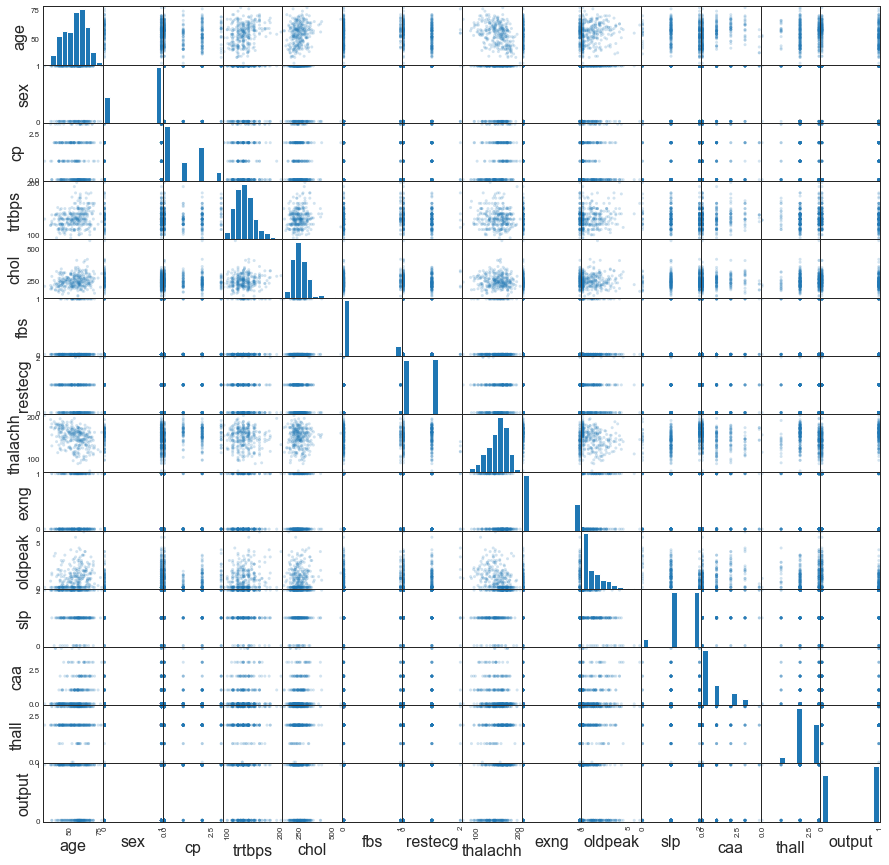

In [10]:
# df scatter matrix
axs = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(15,15), diagonal='hist')
axs[0,0].get_figure().show()

# Correlaction between chance to heart attack and other featuers

Correlation analysis can reveal relationships between heart attack and other featuers in dataset.

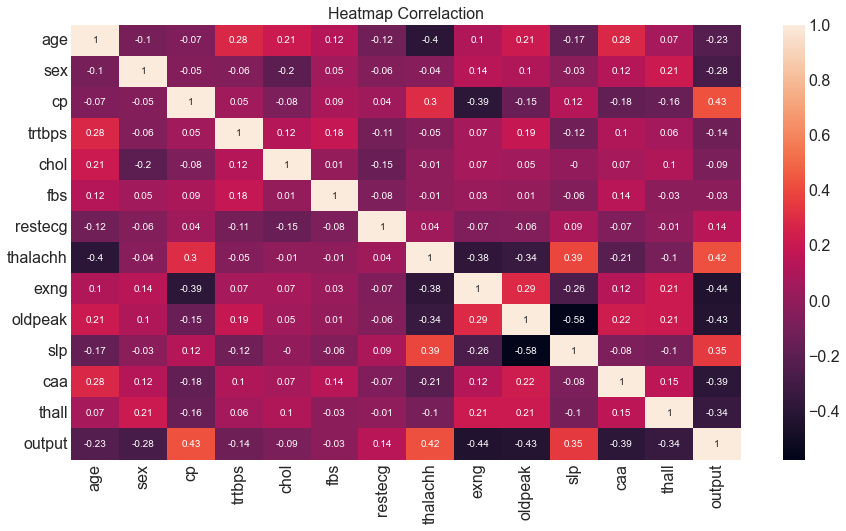

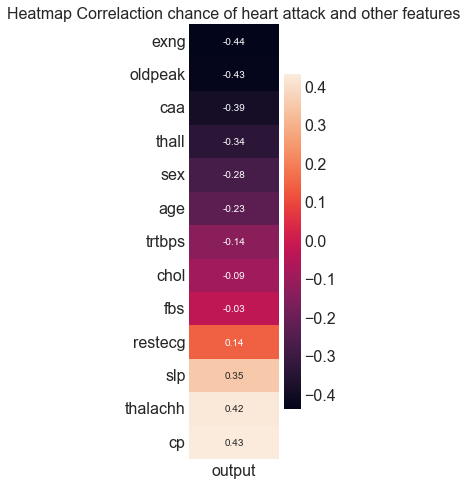

In [11]:
#---- correlaction all features
correlation_matrix = df.corr(method = 'pearson').round(2)
plt.figure(figsize = (15,8))
ax = sns.heatmap(data=correlation_matrix, annot=True)
plt.title("Heatmap Correlaction")
plt.show()
#---- correlaction between chance of heart attack and other features
correlation_output = pd.DataFrame(correlation_matrix['output'].drop(axis = 1, index = 'output')).sort_values('output')
plt.figure(figsize = (2,8))
ax = sns.heatmap(data=correlation_output, annot=True)
plt.title("Heatmap Correlaction chance of heart attack and other features")
plt.show()

 # Correlaction between chance to heart attack and other featuers - **analysis**

The highest absolute correlaction is between exercise induced angina 0.44, but this is not even moderate correlation.

In [12]:
# creating buckets for age
bins = [18, 30, 40, 50, 60, 70, 80]
df_mapped['age_buckets'] = pd.cut(df_mapped['age'], bins)

# rename column 'output'
df_mapped.rename(columns = {'output':'Heart attack chances', 'cp':'Chest pain type'}, inplace = True)

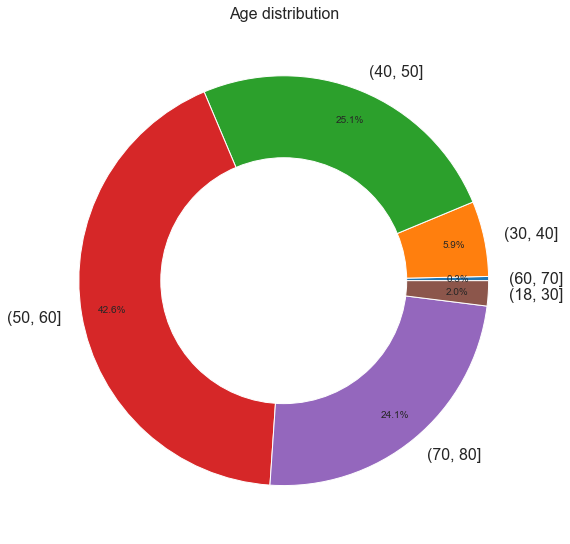

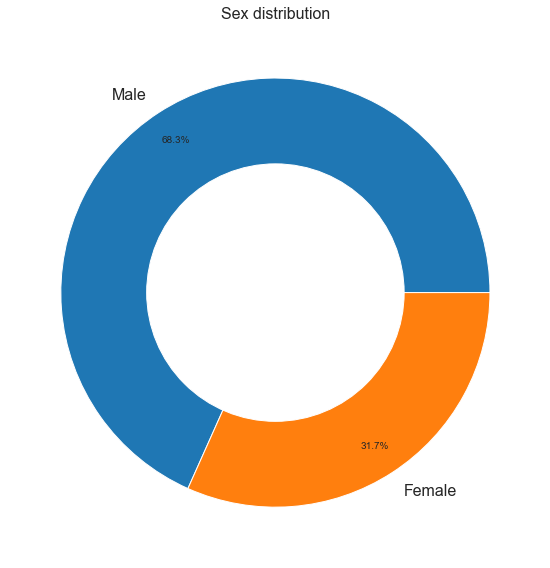

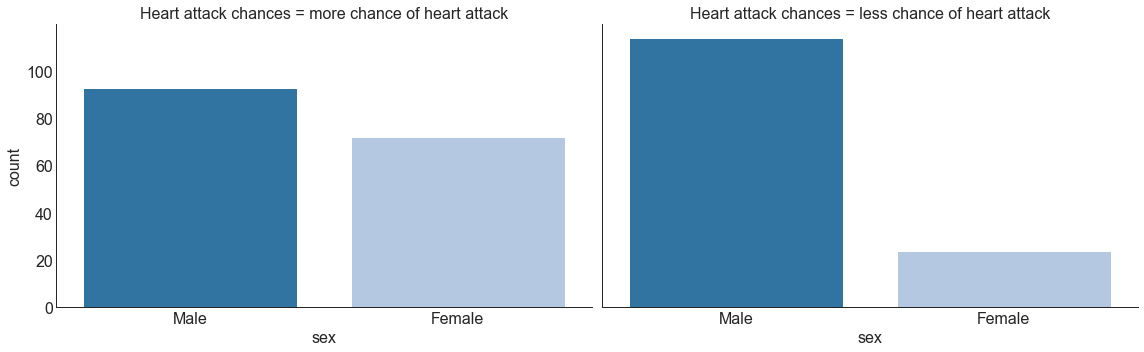

In [13]:
# age buckets chart
df_age_buckets = df_mapped[['Heart attack chances','age_buckets']].groupby('age_buckets').count()['Heart attack chances']

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
label = ['(60, 70]', '(30, 40]', '(40, 50]', '(50, 60]', '(70, 80]', '(18, 30]']
plt.pie(df_age_buckets, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Age distribution",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()
#-----------------------------------------------------------------------------------------------------
# sex distribution
df_sex = df_mapped['sex'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
label = ['Male', 'Female']
plt.pie(df_sex, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Sex distribution",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()
#-----------------------------------------------------------------------------------------------------
# sex vs heart attack chances chart
df_sex_heart = df_mapped[['sex','Heart attack chances']]
g = sns.catplot(x='sex', col='Heart attack chances',
                data=df_sex_heart,
                kind="count", height=5, aspect=1.6, 
                palette='tab20')

fig.suptitle('df_sex_heart')
plt.show()

_______________________________________________________________________________________________________________________________

Chest pain type,asymptomatic,atypical angina,non-anginal pain,typical angina
age_buckets,,,,
"(18, 30]",0,1,0,0
"(30, 40]",3,2,7,6
"(40, 50]",2,20,25,29
"(50, 60]",10,20,34,65
"(60, 70]",8,5,19,41
"(70, 80]",0,2,2,2


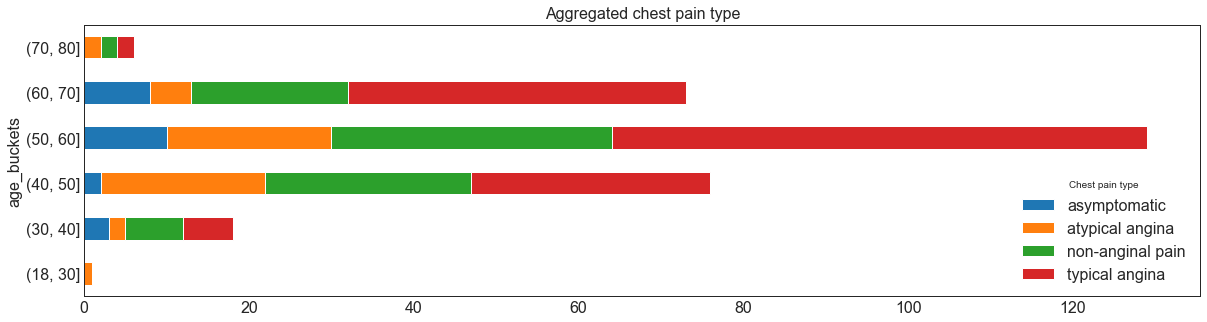

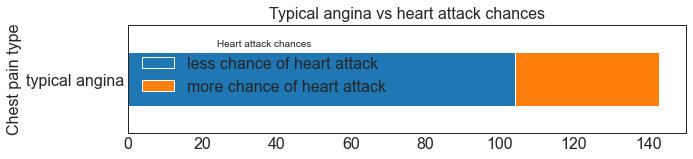

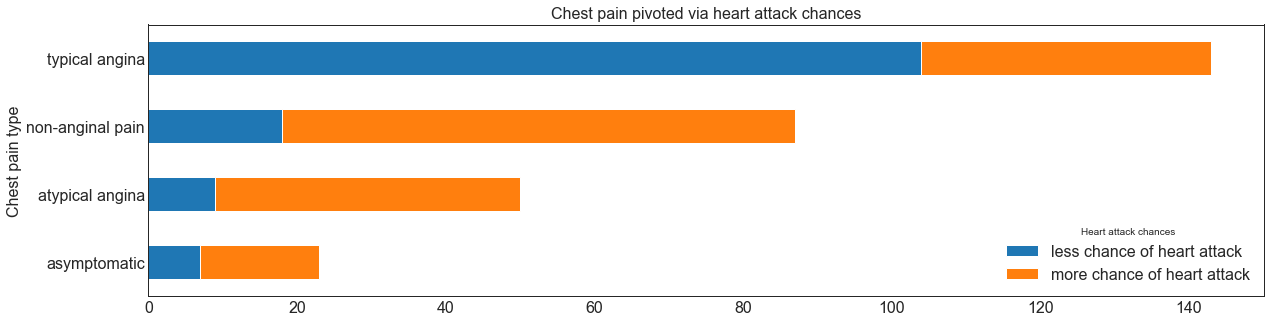

In [14]:
# checkig the distribution of cp over the age bucktes
df_age_cp = df_mapped[['age_buckets','Chest pain type']].groupby(['age_buckets','Chest pain type']).size().unstack(fill_value=0)
df_age_cp_plot = df_age_cp.plot.barh(stacked=True, title='Aggregated chest pain type', figsize=(20, 5))
#df_age_cp.loc["Total"] = df_age_cp.sum()

df_cp_output = df_mapped[['Chest pain type','Heart attack chances']][df_mapped['Chest pain type'] == 'typical angina'].groupby(['Chest pain type','Heart attack chances']).size().unstack(fill_value=0)
df_cp_output_plot = df_cp_output.plot.barh(stacked=True, title='Typical angina vs heart attack chances', figsize=(10, 2))

df_angina = df_mapped[['Chest pain type','Heart attack chances']].groupby(['Chest pain type','Heart attack chances']).size().unstack(fill_value=0)
df_angina_plot = df_angina.plot.barh(stacked=True, title='Chest pain pivoted via heart attack chances', figsize=(20, 5))

df_age_cp

# Distributon of chest pain over age buckets - **analysis**

We can find four grups of chest pain in the study group:
* asymptomatic
* atypical angina
* non-anginal pain
* typical angina

The first impression is that the biggest group (143 people) are suffering **typical angina** symptoms and most of them are in age group from 51 years old up to 60. Important to mention is that it has not big impact on the heart attack chances, what we can observe on the chart above (**Typical angina vs heart attack chances**) - 104 records as less chance of heart attack and 39 as more chance of heart attack.

The last chart illustrates the impact of chest type pain on the chances of heart attack. As earlier mentioned the typical angina is not the main perpetrator of heart attacks. The biggest impact has **non-anginal pain** and **atypical angina**.

_______________________________________________________________________________________________________________________________

restecg,having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),normal,showing probable or definite left ventricular hypertrophy by Estes criteria
age_buckets,,,
"(18, 30]",0,1,0
"(30, 40]",14,4,0
"(40, 50]",44,32,0
"(50, 60]",59,67,3
"(60, 70]",33,40,0
"(70, 80]",2,3,1


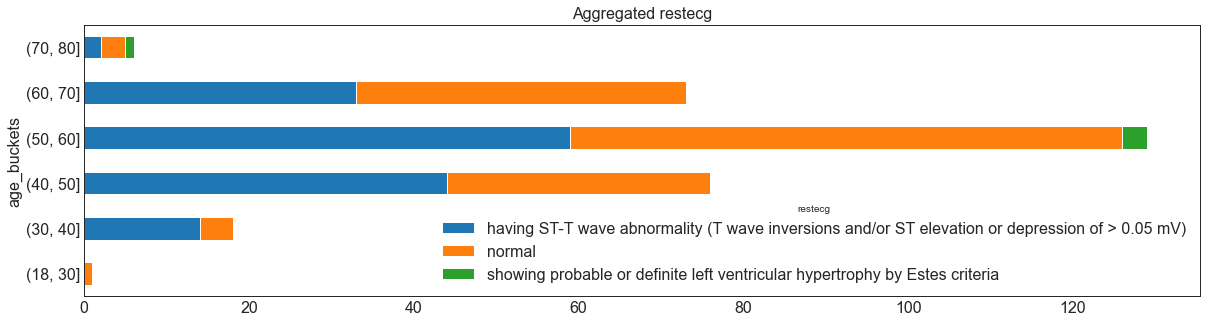

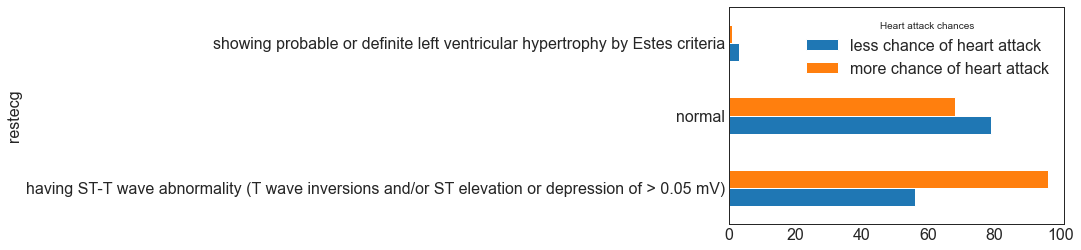

In [15]:
# checkig the distribution of restecg over the age bucktes
df_age_restecg = df_mapped[['age_buckets','restecg']].groupby(['age_buckets','restecg']).size().unstack(fill_value=0)
df_age_restecg_plot = df_age_restecg.plot.barh(stacked=True, title='Aggregated restecg', figsize=(20, 5))
#df_age_restecg.loc["Total"] = df_age_restecg.sum()

df_restecg = df_mapped[['restecg','Heart attack chances']].groupby(['restecg','Heart attack chances']).size().unstack(fill_value=0)
df_restecg.plot.barh()
df_age_restecg

# Distributon of resting electrocardiographic results over age buckets - **analysis**

We can find three grups of resting electrocardiographic results in the study group:
* normal
* having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* showing probable or definite left ventricular hypertrophy by Estes' criteria

The largest group are ST-T wave disorders (T-wave inversions and/or ST elevation or depression > 0.05 mV), these are also results that have a greater impact on the chances of heart attack.

_______________________________________________________________________________________________________________________________

Heart attack chances,less chance of heart attack,more chance of heart attack,ratio
age_buckets,,,
"(18, 30]",0,1,100.0%
"(30, 40]",6,12,66.66%
"(40, 50]",23,53,69.73%
"(50, 60]",65,64,49.61%
"(60, 70]",43,30,41.09%
"(70, 80]",1,5,83.33%


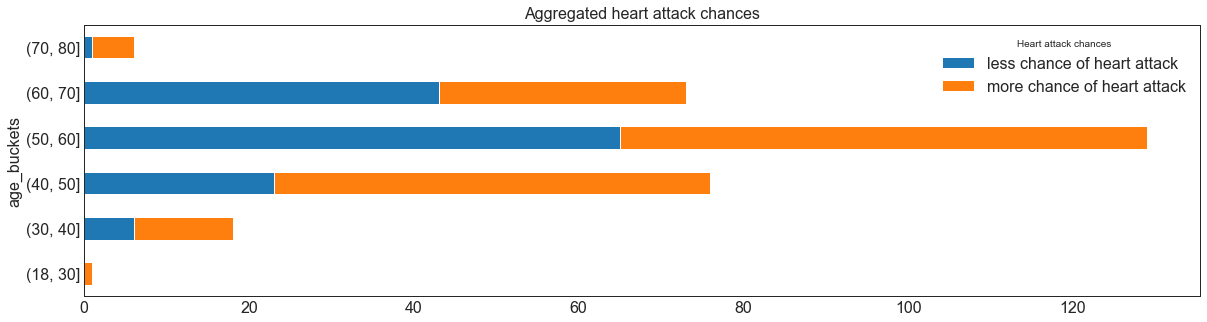

In [16]:
# checkig the distribution of cp over the age bucktes
df_age_output = df_mapped[['age_buckets','Heart attack chances']].groupby(['age_buckets','Heart attack chances']).size().unstack(fill_value=0)
df_age_output_plot = df_age_output.plot.barh(stacked=True, title='Aggregated heart attack chances', figsize=(20, 5))
df_age_output['ratio'] = (df_age_output['more chance of heart attack'] / df_age_output.sum(axis=1) * 100).astype(str).str[:5] + "%"
df_age_output

The biggest difference between the "lower chance of a heart attack" and "higher chance of a heart attack" can be observed in the bucket (40.50]-year-olds (buckets (18.30] and (70.80) have a greater ratio, but due to the small number of records) we can skip this.)

A bucket (40.50] with 129 observations has over 69% "higher chance of a heart attack"

_______________________________________________________________________________________________________________________________

In [17]:
# setting the df for numercial features 
df_numerical = df_mapped[['age_buckets','sex','trtbps','chol','fbs','Heart attack chances']]

# creating TRTBPS
bins = [80, 100, 120, 140, 160, 180, 200]
df_numerical['trtbps_buckets'] = pd.cut(df_numerical['trtbps'], bins)

# # creating CHOL
df_numerical['chol_buckets'] = pd.cut(df_numerical['chol'], bins=6)

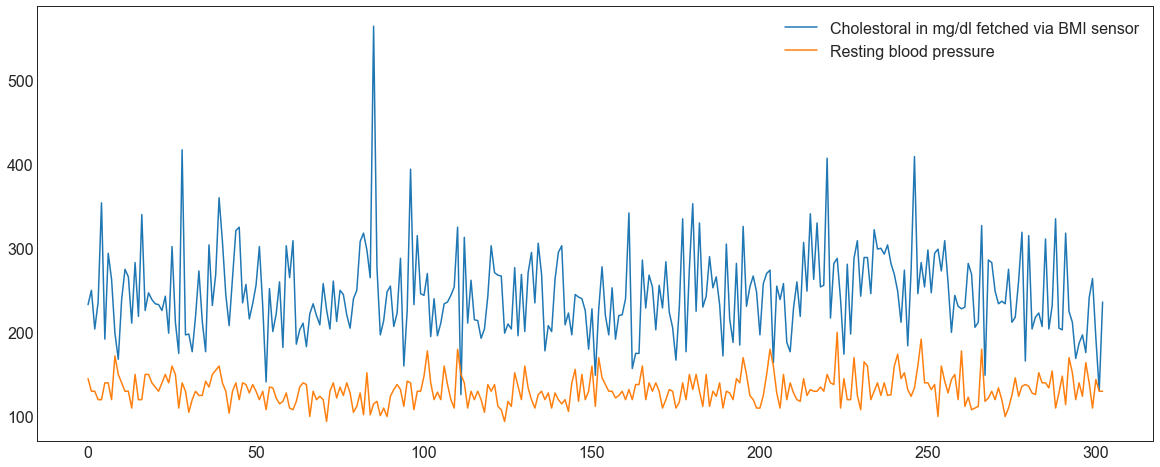

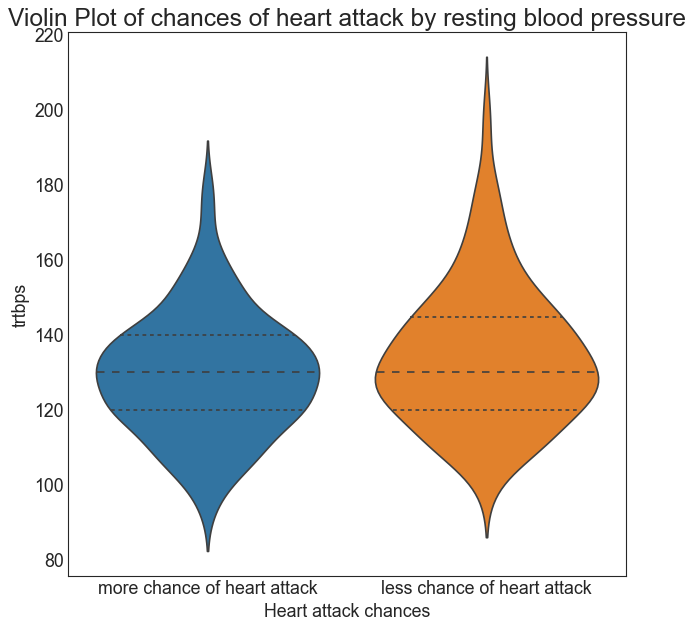

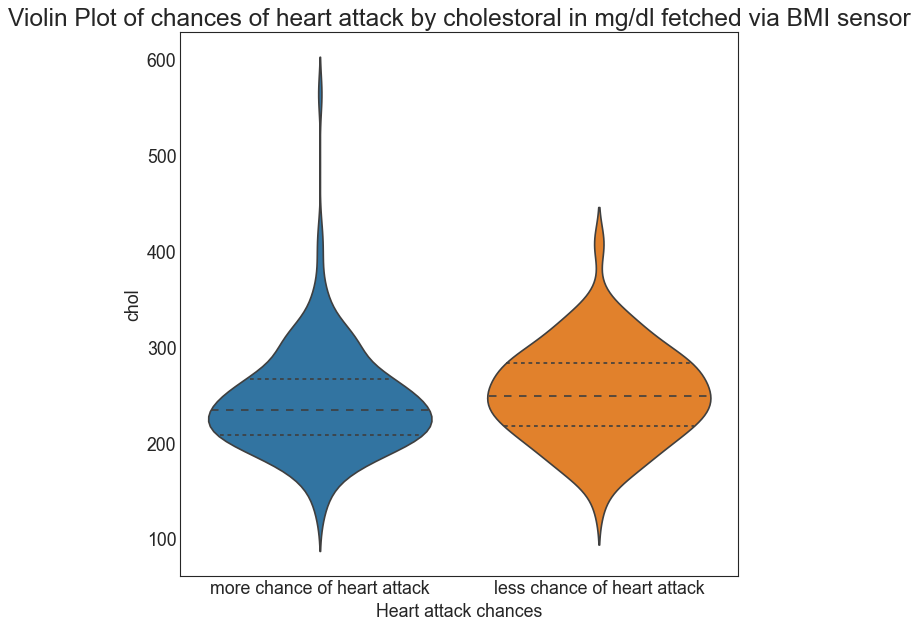

Heart attack chances,less chance of heart attack,more chance of heart attack
trtbps_buckets,,
"(80, 100]",2,4
"(100, 120]",35,56
"(120, 140]",63,78
"(140, 160]",27,23
"(160, 180]",9,4
"(180, 200]",2,0
Heart attack chances,less chance of heart attack,more chance of heart attack
chol_buckets,,
"(125.562, 199.0]",20,30


In [18]:
# create line chart for chol and trtbps
x = df_numerical['chol']
y = df_numerical['trtbps']
  
# plot lines
plt.figure(figsize=(20,8))
plt.plot(x, label = "Cholestoral in mg/dl fetched via BMI sensor")
plt.plot(y, label = "Resting blood pressure")
plt.legend()
plt.show()
#----------------------------------------------------------------------------------------
# violin charts
df_chart = df_numerical[['trtbps','Heart attack chances']]
df_chart2 = df_numerical[['chol','Heart attack chances']]

# Draw Plot 1
plt.figure(figsize=(9,9), dpi= 80)
sns.violinplot(x='Heart attack chances', y='trtbps', data=df_chart, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of chances of heart attack by resting blood pressure', fontsize=22)
plt.show()
#----------------------------------------------------------------------------------------
# Draw Plot 2
plt.figure(figsize=(9,9), dpi= 80)
sns.violinplot(x='Heart attack chances', y='chol', data=df_chart2, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of chances of heart attack by cholestoral in mg/dl fetched via BMI sensor', fontsize=22)
plt.show()
#----------------------------------------------------------------------------------------
# function to print two data frames in one line
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

df_temp1 = df_numerical[['trtbps_buckets','Heart attack chances']].groupby(['trtbps_buckets','Heart attack chances']).size().unstack(fill_value=0)
#df_temp1.loc["Total"] = df_temp1.sum()
df_temp2 = df_numerical[['chol_buckets','Heart attack chances']].groupby(['chol_buckets','Heart attack chances']).size().unstack(fill_value=0)
#df_temp2.loc["Total"] = df_temp2.sum()

display_side_by_side(df_temp1, df_temp2, titles=['Resting blood pressure','Cholestoral in mg/dl fetched via BMI sensor'])

# Analysis of following columns:
* trtbps - **Resting blood pressure**
* chol - **Cholestoral in mg/dl fetched via BMI sensor**

The first thing was to bucketize the data so it will be more transparent to read. We have created for trtbps and chol 6 buckets, splited to equal parts.

**Resting blood pressure**
As we can see on the charts above, the resting blood pressure has less fluctuations. The values are in range between 94 and 200 with the mode in the bucket (120,140]. 

**Cholestoral in mg/dl fetched via BMI sensor**
the fluctuations of this indicator are extremely large, the values are in range between 125 and 564 with the mode in the bucket (199.0, 272.0]. However worth to mention is that the maximum value is an exception because the second max value is equal to 418, so the diffirance between first and second maximum value is equal 146.

_______________________________________________________________________________________________________________________________

# Preparing and modelling the data

### Preparing data

In [19]:
# converting categorical columns
numerical_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical_cols = df.drop(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak','output'], axis=1).columns.tolist()

In [20]:
# encoding the categorical columns
from sklearn.preprocessing import RobustScaler

df1 = df.copy()
df1 = pd.get_dummies(df1, columns = categorical_cols, drop_first = True)

# defining the features and target
y = df1[['output']]
X = df1.drop(['output'],axis=1)

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [21]:
# setting the train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

_______________________________________________________________________________________________________________________________

### GradientBoosted Classifier model

In [22]:
# instantiate the classifier and test which learning rate is the best
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gbt = GradientBoostingClassifier(n_estimators = 300, max_depth=1, learning_rate=learning_rate, subsample=0.8, max_features=0.2, random_state=42)

    # fitting the model
    y_train = np.ravel(y_train)
    gbt.fit(X_train,y_train)

    # predicting values
    predictions = gbt.predict(X_test)
    print("\nLearning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gbt.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gbt.score(X_test, y_test)))


Learning rate:  0.05
Accuracy score (training): 0.888
Accuracy score (validation): 0.869

Learning rate:  0.075
Accuracy score (training): 0.901
Accuracy score (validation): 0.869

Learning rate:  0.1
Accuracy score (training): 0.905
Accuracy score (validation): 0.869

Learning rate:  0.25
Accuracy score (training): 0.934
Accuracy score (validation): 0.836

Learning rate:  0.5
Accuracy score (training): 0.975
Accuracy score (validation): 0.836

Learning rate:  0.75
Accuracy score (training): 0.992
Accuracy score (validation): 0.820

Learning rate:  1
Accuracy score (training): 0.996
Accuracy score (validation): 0.754


Due to above check, we can choose learing_rate 0.1 (the best fit)

In [23]:
# using learining_rate equal 0.1
gbt = GradientBoostingClassifier(n_estimators = 300, max_depth=1, learning_rate=0.1, subsample=0.8, max_features=0.2, random_state=42)

# fitting the model
y_train = np.ravel(y_train)
gbt.fit(X_train,y_train)

# predicting values
predictions_gbt = gbt.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_gbt))

print("\nClassification Report")
print(classification_report(y_test, predictions_gbt))

Confusion Matrix:
[[26  3]
 [ 5 27]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



_______________________________________________________________________________________________________________________________

### XGBClassifier

In [24]:
# instantiate the classifier and test which learning rate is the best
# turn off warining due to the pandas warning
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
import xgboost as xgb

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5]
for learning_rate in lr_list:
    xgb_clf = XGBClassifier(colsample_bytree = 0.5, learning_rate = learning_rate, 
                            max_depth = 5, alpha = 10, n_estimators = 10,  eval_metric='mlogloss', use_label_encoder =False)
    xgb_clf.fit(X_train, y_train)

    # make predictions for test data
    predictions_xgb = xgb_clf.predict(X_test)

    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions_xgb)
    print(f"Learning rate:{learning_rate}, Accuracy: %.2f%%" % (accuracy * 100.0))

Learning rate:0.05, Accuracy: 83.61%
Learning rate:0.075, Accuracy: 83.61%
Learning rate:0.1, Accuracy: 85.25%
Learning rate:0.25, Accuracy: 83.61%
Learning rate:0.5, Accuracy: 85.25%
Learning rate:0.75, Accuracy: 85.25%
Learning rate:1, Accuracy: 86.89%
Learning rate:2, Accuracy: 85.25%
Learning rate:3, Accuracy: 73.77%
Learning rate:4, Accuracy: 73.77%
Learning rate:5, Accuracy: 81.97%


Due to above check, we can choose learing_rate 1 (the best fit)

In [25]:
# create final XGBClassifier
xgb_clf = XGBClassifier(colsample_bytree = 0.5, learning_rate = 1,
                        max_depth = 5, alpha = 10, n_estimators = 10,  eval_metric='mlogloss', use_label_encoder =False)
xgb_clf.fit(X_train, y_train)

# make predictions for test data
predictions_xgb = xgb_clf.predict(X_test)
#predictions_xgb = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

warnings.filterwarnings("default")

Accuracy: 86.89%


# XGBClassifier tree
Below 3 cells are creating the XGBClassifier tree for wich you need extra set up:
* Install graphviz: pip install graphviz
* Download newest version: https://graphviz.org/download/
* Install: winget install graphviz
* Add the graphviz binaries to your system PATH variable

In [26]:
# set up PATH
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [27]:
# Convert data into Dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

# Use the parameters that we used in modelling
params = {'colsample_bytree':0.5, 'learning_rate':1, 'max_depth':5, 'alpha':10,
          'eval_metric':'mlogloss'}
    
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    early_stopping_rounds=10, metrics="rmse", seed=123)

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

C:\Users\mateu\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


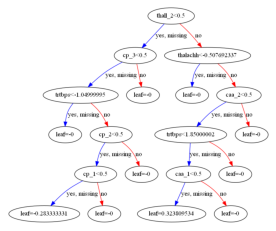

'XGBC_tree.png'

In [28]:
# create tree
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

format = 'png' 
image = xgb.to_graphviz(xg_reg)
image.graph_attr = {'dpi':'500'}
image.render('XGBC_tree', format = format)

_______________________________________________________________________________________________________________________________

### Decision Tree

In [29]:
# Create DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier

treeModel = DecisionTreeClassifier(max_depth=5)
treeModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [30]:
# Print the accuracy of the model
accuracy = treeModel.score(X_test,y_test)
print(f"The accuracy score of Decision Tree is {round(accuracy*100,2)} %" )

The accuracy score of Decision Tree is 75.41 %


In [31]:
# to create DecisionTree graph you need also graphviz access
import joblib
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus

outputPath = 'treeModel.joblib'
joblib.dump(treeModel, outputPath)
y_pred = treeModel.predict(X_test)
dot_data = StringIO()
export_graphviz(treeModel, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('Decision_Tree.png')

In [32]:
# text_representation = tree.export_text(treeModel)
# print(text_representation)

______________________________________________________________________________________________________

# Comparison of the models:
* GradientBoosted Classifier
* XGBClassifier
* Decision Tree

C:\Users\mateu\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


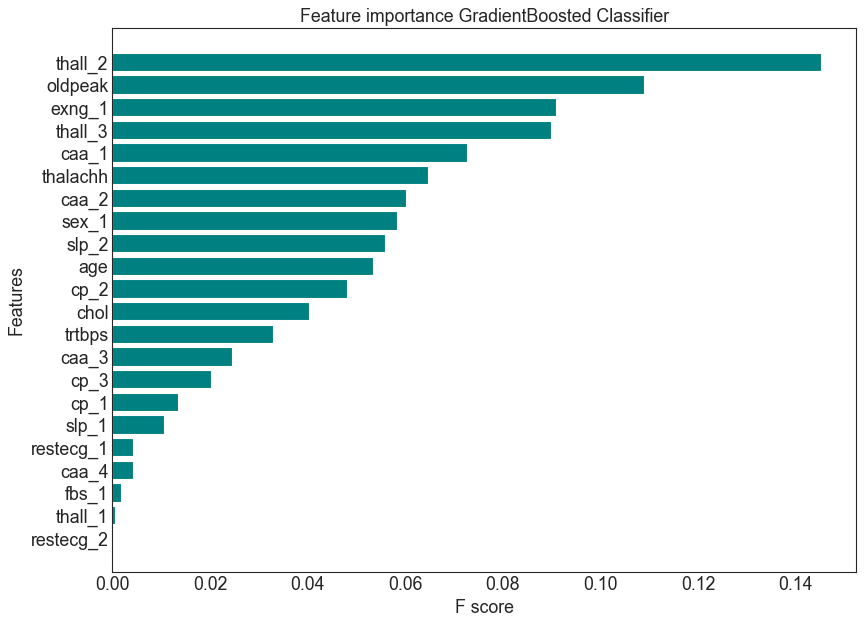

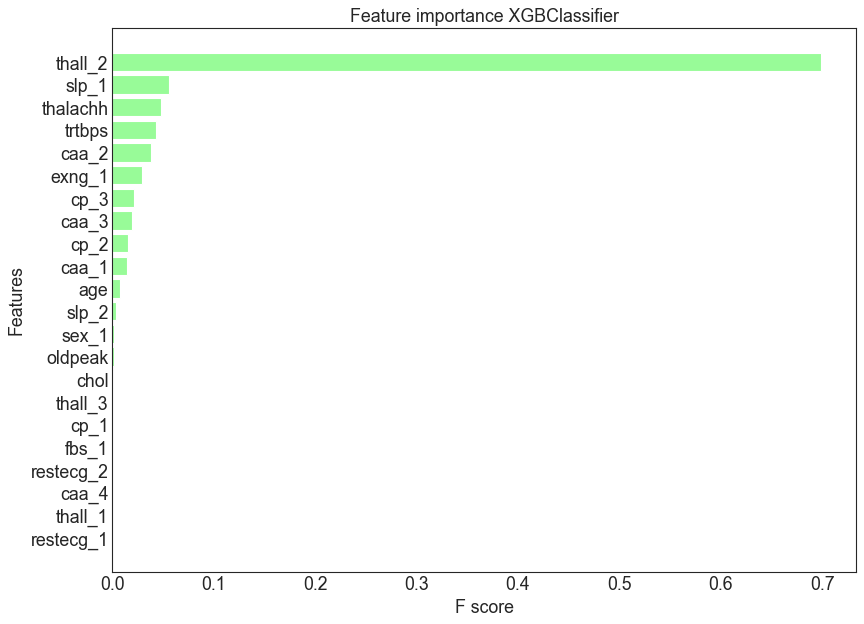

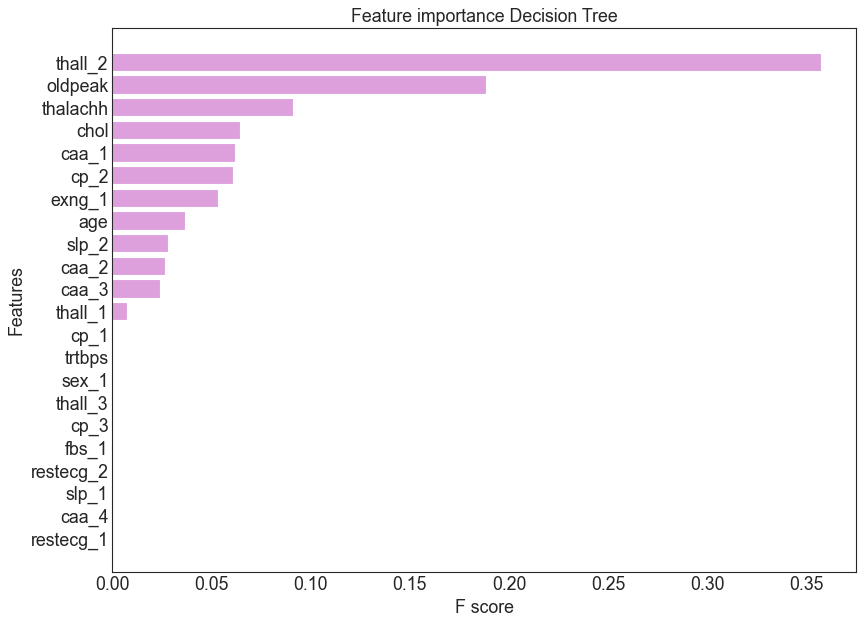

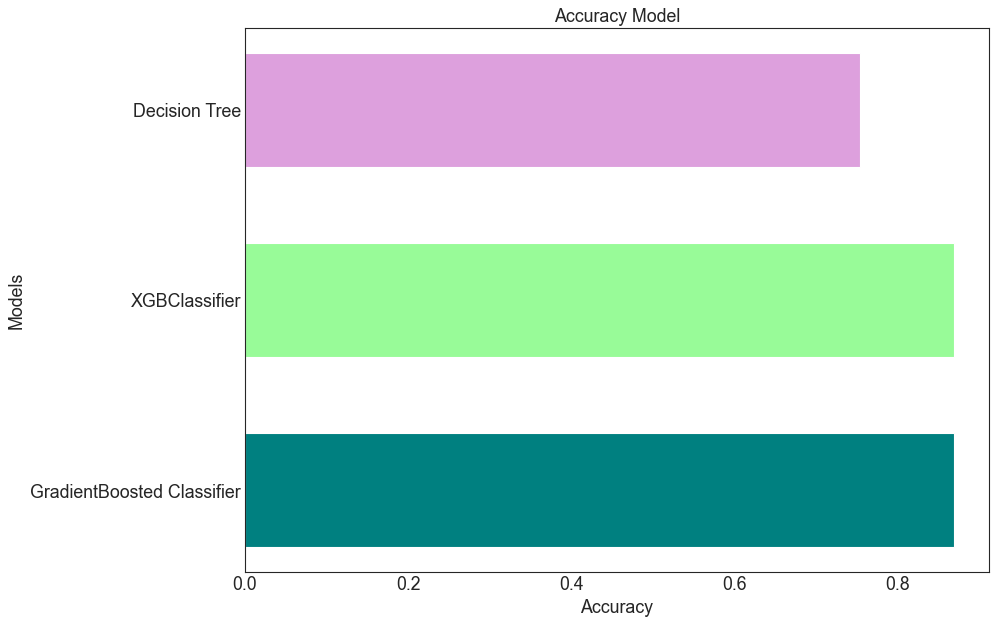

The accuracy score of GradientBoosted Classifier is 86.89 %
The accuracy score of XGBClassifier is 86.89 %
The accuracy score of Decision Tree is 75.41 %


In [33]:
modelName = ['GradientBoosted Classifier','XGBClassifier','Decision Tree']
modelAccuracy = [gbt.score(X_test,y_test), xgb_clf.score(X_test,y_test), treeModel.score(X_test,y_test)] 
ModelsFeatures = X_test.columns

#GradientBoosted Classifer
gbt_feature_importances = pd.DataFrame(gbt.feature_importances_, ModelsFeatures).rename(columns = {0: 'F_score'}).sort_values('F_score')
plt.figure(figsize=(12,9), dpi= 80)
plt.barh(gbt_feature_importances.index,gbt_feature_importances['F_score'], color = 'teal' )
plt.xlabel('F score')
plt.ylabel('Features')
plt.title('Feature importance GradientBoosted Classifier')
plt.show()

#XGBClassifier
xgb_clf_feature_importances = pd.DataFrame(xgb_clf.feature_importances_, ModelsFeatures).rename(columns = {0: 'F_score'}).sort_values('F_score')
plt.figure(figsize=(12,9), dpi= 80)
plt.barh(xgb_clf_feature_importances.index,xgb_clf_feature_importances['F_score'], color = 'palegreen')
plt.xlabel('F score')
plt.ylabel('Features')
plt.title('Feature importance XGBClassifier')
plt.show()

#Decision Tree
treeModel_feature_importances = pd.DataFrame(treeModel.feature_importances_, ModelsFeatures).rename(columns = {0: 'F_score'}).sort_values('F_score')
plt.figure(figsize=(12,9), dpi= 80)
plt.barh(treeModel_feature_importances.index,treeModel_feature_importances['F_score'], color = 'plum')
plt.xlabel('F score')
plt.ylabel('Features')
plt.title('Feature importance Decision Tree')
plt.show()

#Accuracy
plt.figure(figsize=(12,9), dpi= 80)
plt.barh(modelName,modelAccuracy, color = ['teal','palegreen','plum'], height=0.6, left=None)
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Accuracy Model')
plt.show()

print(f"The accuracy score of GradientBoosted Classifier is {round(modelAccuracy[0]*100,2)} %" )
print(f"The accuracy score of XGBClassifier is {round(modelAccuracy[1]*100,2)} %" )
print(f"The accuracy score of Decision Tree is {round(modelAccuracy[2]*100,2)} %" )

## Conclusion

According to the bar graph, we can conclude that the model that present a greatest accuracy to predict if a person has a greater chance of presenting a heart attack is the GradientBoosted Classifier and XGBClassifier (the same model created with two diffirent libraries). 

The model is able to predict whether a patient is more or less likely to have a heart attack with ~ 87% accuracy.

___________________________________________________________________________________________________________________

## Save data for Tableau

In [34]:
df_mapped['age_buckets'] = df_mapped['age_buckets'].astype(str)

In [35]:
import openpyxl
df_mapped.to_excel('test.xlsx')